In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.shape

(908, 13)

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

EDA

<Axes: >

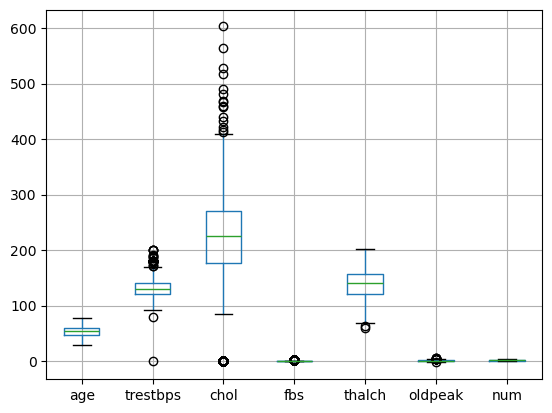

In [12]:
df.boxplot()

In [13]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    df[column]=df[column].apply (lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)



In [14]:
df.boxplot()

<Axes: >

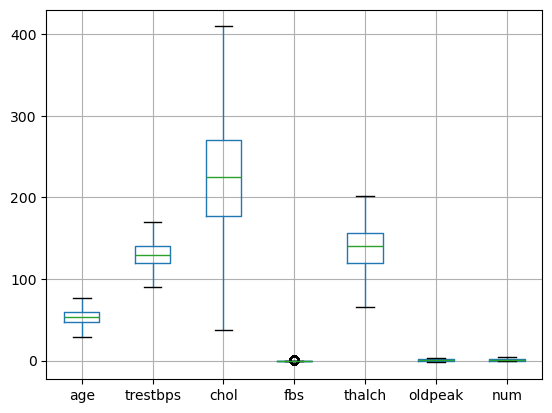

In [15]:
plt.show()

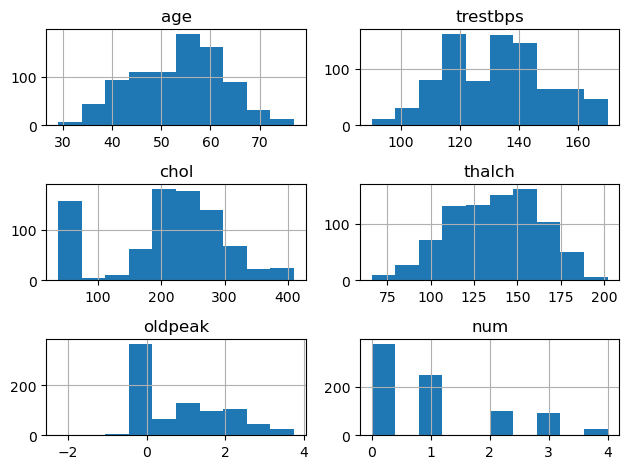

In [16]:
df.hist()
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label=LabelEncoder()


In [19]:
fea=df.select_dtypes(include=["object","bool"])

In [20]:
fea

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,False,normal,False,flat,fixed defect
2,Male,asymptomatic,False,normal,False,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,False,normal,True,flat,fixed defect
...,...,...,...,...,...,...,...
901,Male,asymptomatic,True,normal,False,flat,normal
902,Male,asymptomatic,True,st-t abnormality,True,flat,normal
903,Male,asymptomatic,False,normal,False,upsloping,normal
904,Male,asymptomatic,False,st-t abnormality,True,flat,reversable defect


In [21]:
for col in fea:
    df[col]=label.fit_transform(df[col].astype("str"))
    

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,1,2.3,0,0,0
1,41,1,1,135.0,203.0,0,1,132.0,1,0.0,1,0,0
2,57,1,0,140.0,192.0,0,1,148.0,1,0.4,1,0,0
3,52,1,3,118.0,186.0,0,0,190.0,1,0.0,1,0,0
4,57,1,0,110.0,201.0,0,1,126.0,2,1.5,1,0,0


In [23]:
corr=df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.036024,-0.091885,0.258537,-0.100165,0.177026,-0.037690,-0.346069,0.193555,0.246413,-0.051361,0.037857,0.331071
sex,0.036024,1.000000,-0.140694,0.008412,-0.204829,0.075313,0.055863,-0.175822,0.185459,0.109207,-0.047406,0.083794,0.259206
cp,-0.091885,-0.140694,1.000000,-0.009583,0.061494,-0.033356,-0.105577,0.292508,-0.374810,-0.177419,0.096976,-0.065985,-0.332296
trestbps,0.258537,0.008412,-0.009583,1.000000,0.110368,0.098889,0.024235,-0.106424,0.147784,0.177834,0.013599,0.044059,0.133554
chol,-0.100165,-0.204829,0.061494,0.110368,1.000000,-0.122336,-0.206194,0.222058,-0.032851,0.032088,0.051265,-0.034920,-0.246775
fbs,0.177026,0.075313,-0.033356,0.098889,-0.122336,1.000000,0.027196,-0.062058,0.013048,0.028041,-0.042744,-0.057734,0.138187
restecg,-0.037690,0.055863,-0.105577,0.024235,-0.206194,0.027196,1.000000,-0.181753,0.057350,-0.031286,-0.101629,-0.108667,0.003822
thalch,-0.346069,-0.175822,0.292508,-0.106424,0.222058,-0.062058,-0.181753,1.000000,-0.347074,-0.143900,0.250268,-0.064868,-0.349735
exang,0.193555,0.185459,-0.374810,0.147784,-0.032851,0.013048,0.057350,-0.347074,1.000000,0.392146,-0.163897,0.111407,0.384993
oldpeak,0.246413,0.109207,-0.177419,0.177834,0.032088,0.028041,-0.031286,-0.143900,0.392146,1.000000,-0.188358,0.033554,0.438931


In [24]:
sns.heatmap(corr,annot=True,fmt='.1f')

<Axes: >

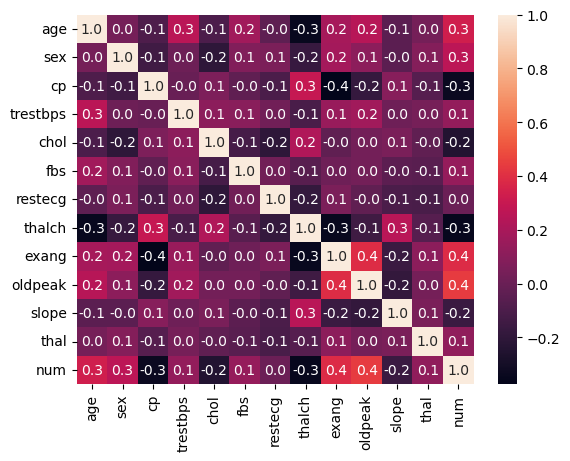

In [25]:
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mi=MinMaxScaler()
scaled_features=mi.fit_transform(df)

In [28]:
scaled_features

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.6875    , 1.        , 0.        , ..., 0.5       , 1.        ,
        1.        ],
       [0.5625    , 1.        , 0.66666667, ..., 0.        , 1.        ,
        1.        ]])

In [29]:
featured_scaled=pd.DataFrame(scaled_features,columns=df.columns)

In [30]:
featured_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1.0,1.000000,0.6875,0.525538,1.0,0.0,0.617647,0.5,0.758333,0.0,0.0,0.0
1,0.250000,1.0,0.333333,0.5625,0.444892,0.0,0.5,0.485294,0.5,0.375000,0.5,0.0,0.0
2,0.583333,1.0,0.000000,0.6250,0.415323,0.0,0.5,0.602941,0.5,0.441667,0.5,0.0,0.0
3,0.479167,1.0,1.000000,0.3500,0.399194,0.0,0.0,0.911765,0.5,0.375000,0.5,0.0,0.0
4,0.583333,1.0,0.000000,0.2500,0.439516,0.0,0.5,0.441176,1.0,0.625000,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,0.458333,1.0,0.000000,0.2500,0.000000,1.0,0.5,0.191176,0.5,0.375000,0.5,0.5,1.0
841,0.687500,1.0,0.000000,0.8750,0.581989,1.0,1.0,0.308824,1.0,0.875000,0.5,0.5,1.0
842,0.500000,1.0,0.000000,0.4375,0.000000,0.0,0.5,0.397059,0.5,0.625000,1.0,0.5,1.0
843,0.687500,1.0,0.000000,0.9500,0.356183,0.0,1.0,0.397059,1.0,0.875000,0.5,1.0,1.0


In [31]:
target=df[["num"]]
features=df.drop(columns="num")

In [32]:
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
901,4
902,4
903,4
904,4


In [33]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145.0,233.0,1,0,150.0,1,2.3,0,0
1,41,1,1,135.0,203.0,0,1,132.0,1,0.0,1,0
2,57,1,0,140.0,192.0,0,1,148.0,1,0.4,1,0
3,52,1,3,118.0,186.0,0,0,190.0,1,0.0,1,0
4,57,1,0,110.0,201.0,0,1,126.0,2,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110.0,37.5,1,1,92.0,1,0.0,1,1
902,62,1,0,160.0,254.0,1,2,108.0,2,3.0,1,1
903,53,1,0,125.0,37.5,0,1,120.0,1,1.5,2,1
904,62,1,0,166.0,170.0,0,2,120.0,2,3.0,1,2


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(676, 12)
(169, 12)
(676, 1)
(169, 1)
